# Kaggle Notebook
This notebook is summarizes the best of what has been done in the kernels. At First, I sort the public submissions by `best score`, and then choose languages by `python`. I can get the result as follows:

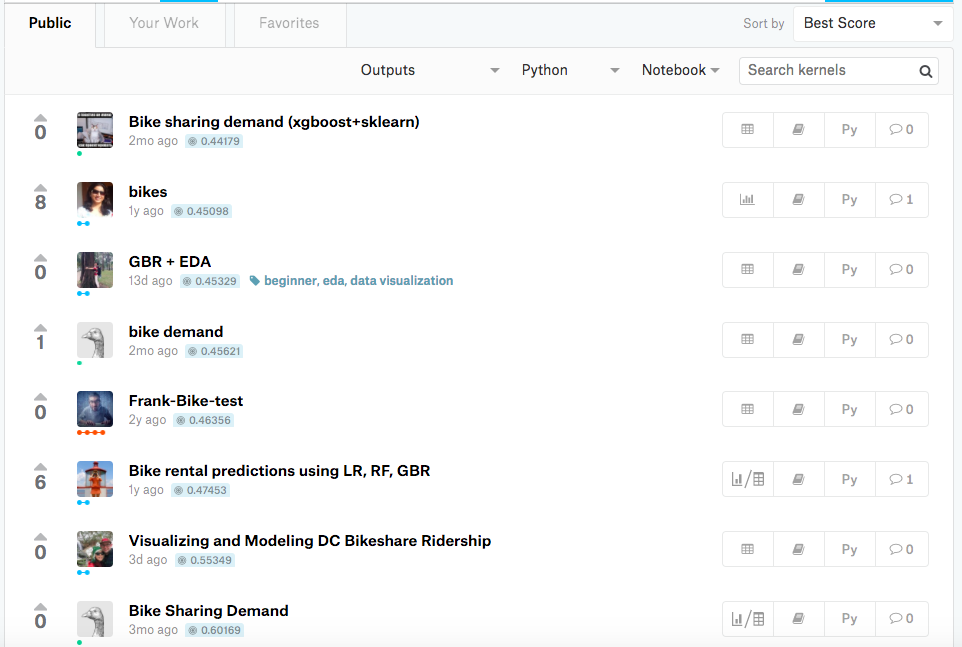


Here can see that the best score is 0.44179. However, the best score in Public Leaderboard is 0.3375. I saw the kagglers did only order by the `best score` and found that better ones are most use R languages. There is no way for me to show the processes which is written by R. What I can do is collect more works Kagglers did, and combine the good points together to improve the quality of my own project.

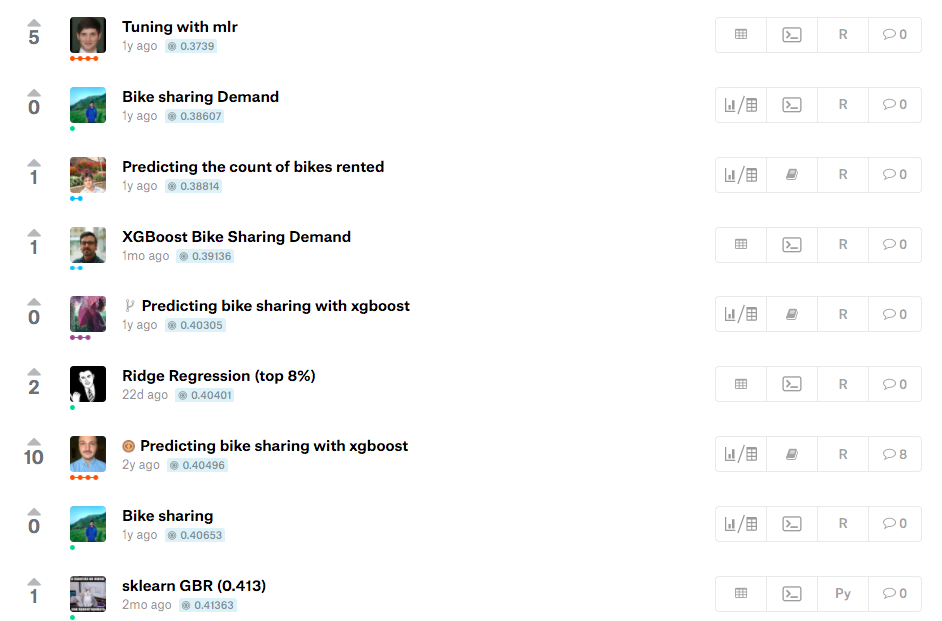

For the purpose I said above, I reorder the results by `Most Votes`. No matter how many score they get, there must be great points in their project if many users voted their project. I choose some tops to do research.

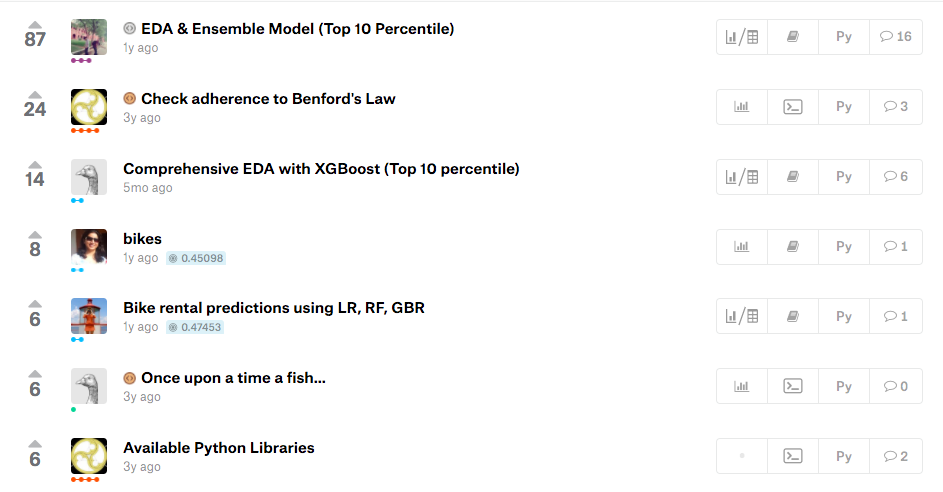

## No.1 
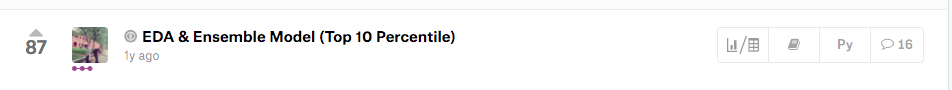

In [4]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

**Lead Data**

In [6]:
dailyData = pd.read_csv("data/train.csv")

In [7]:
dailyData.shape

(10886, 12)

In [8]:
dailyData.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [9]:
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

**Feature Engineering**

As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

Create new columns "date,"hour","weekDay","month" from "datetime" column.
Coerce the datatype of "season","holiday","workingday" and weather to category.
Drop the datetime column as we already extracted useful features from it.


Creating New Columns From "Datetime" Column

In [10]:
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

Coercing To Category Type

In [11]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

Dropping Unncessary Columns

In [12]:
dailyData  = dailyData.drop(["datetime"],axis=1)

Lets Start With Very Simple Visualization Of Variables DataType Count

[Text(0,0.5,u'Count'),
 Text(0.5,0,u'variableTypeariable Type'),
 Text(0.5,1,u'Variables DataType Count')]

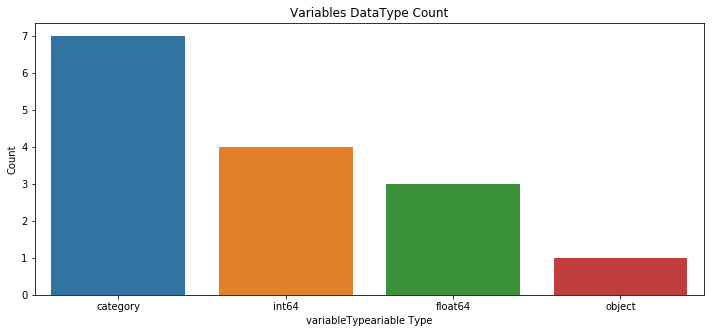

In [13]:
dataTypeDf = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

**Missing Values Analysis**

Once we get hang of the data and columns, next step we geneally is to find out whether we have any missing values in our data. Luckily we dont have any missing value in the dataset. One way which I generally prefer to visualize missing value in the dataset is through "missingno".

Its a quiet handy library to quickly visualize variables for missing values. As I mentioned earlier we got lucky this time as there no missing value in the dataset.


Skewness In Distribution

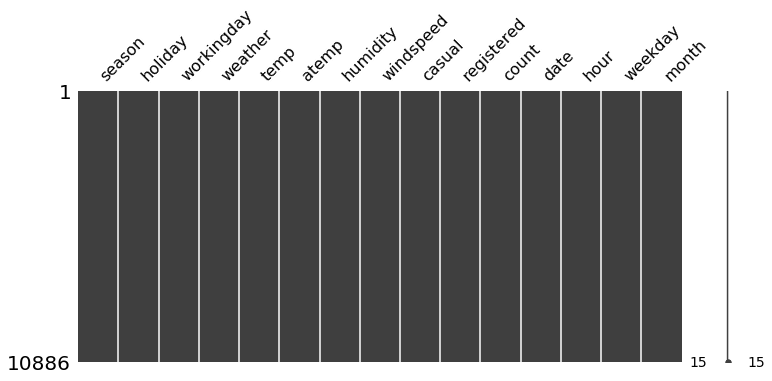

In [14]:
msno.matrix(dailyData,figsize=(12,5))

**Outliers Analysis**

At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.

[Text(0,0.5,u'Count'),
 Text(0.5,0,u'Working Day'),
 Text(0.5,1,u'Box Plot On Count Across Working Day')]

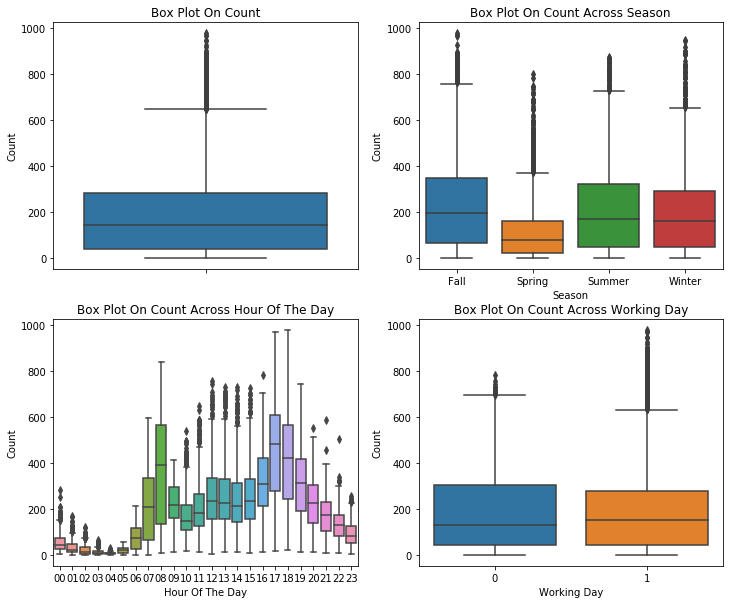

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=dailyData,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=dailyData,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

Lets Remove Outliers In The Count Column

In [16]:
dailyDataWithoutOutliers = dailyData[np.abs(dailyData["count"]-dailyData["count"].mean())<=(3*dailyData["count"].std())] 

In [17]:
print ("Shape Of The Before Ouliers: ",dailyData.shape)
print ("Shape Of The After Ouliers: ",dailyDataWithoutOutliers.shape)

('Shape Of The Before Ouliers: ', (10886, 15))
('Shape Of The After Ouliers: ', (10739, 15))


**Correlation Analysis**


One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
"Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.
Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

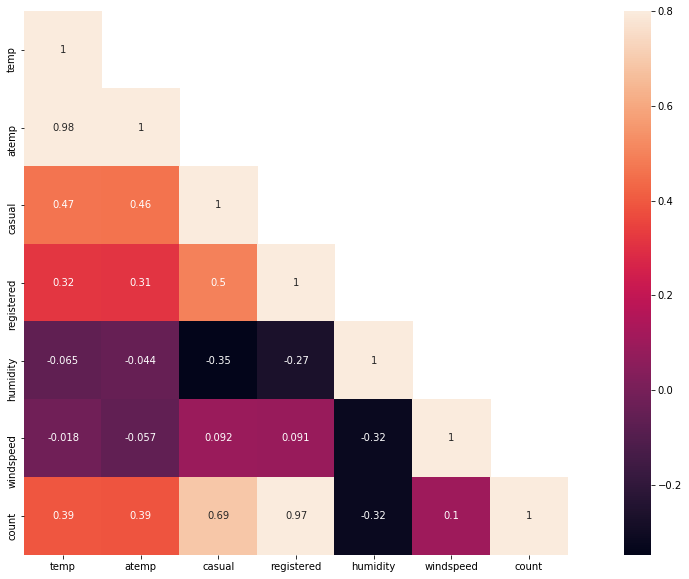

In [18]:
corrMatt = dailyData[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

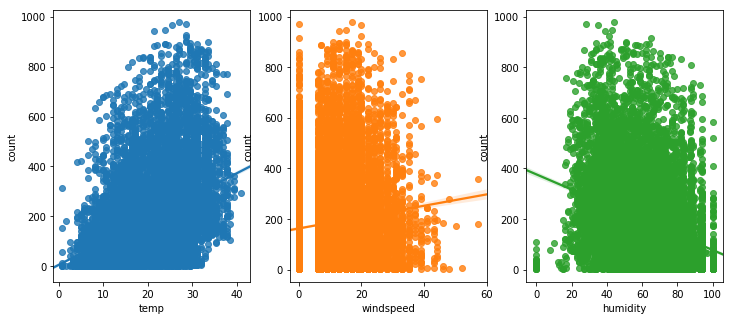

In [19]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=dailyData,ax=ax1)
sn.regplot(x="windspeed", y="count", data=dailyData,ax=ax2)
sn.regplot(x="humidity", y="count", data=dailyData,ax=ax3)

**Visualizing Distribution Of Data**

As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229778, 4.562423868087808, 0.9581176780909615))

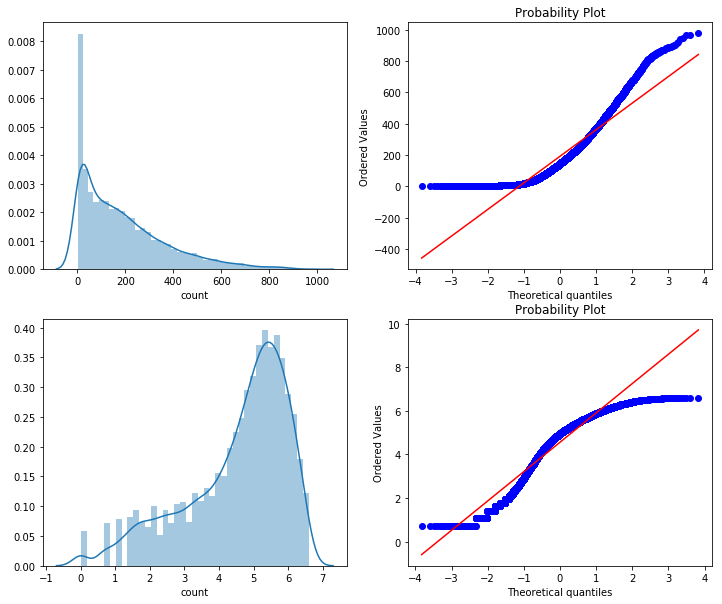

In [20]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.distplot(dailyData["count"],ax=axes[0][0])
stats.probplot(dailyData["count"], dist='norm', fit=True, plot=axes[0][1])
sn.distplot(np.log(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

**Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)**

* It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.
* On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
* Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
* The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.

[Text(0,0.5,u'Users Count'),
 Text(0.5,0,u'Hour Of The Day'),
 Text(0.5,1,u'Average Users Count By Hour Of The Day Across User Type'),
 None]

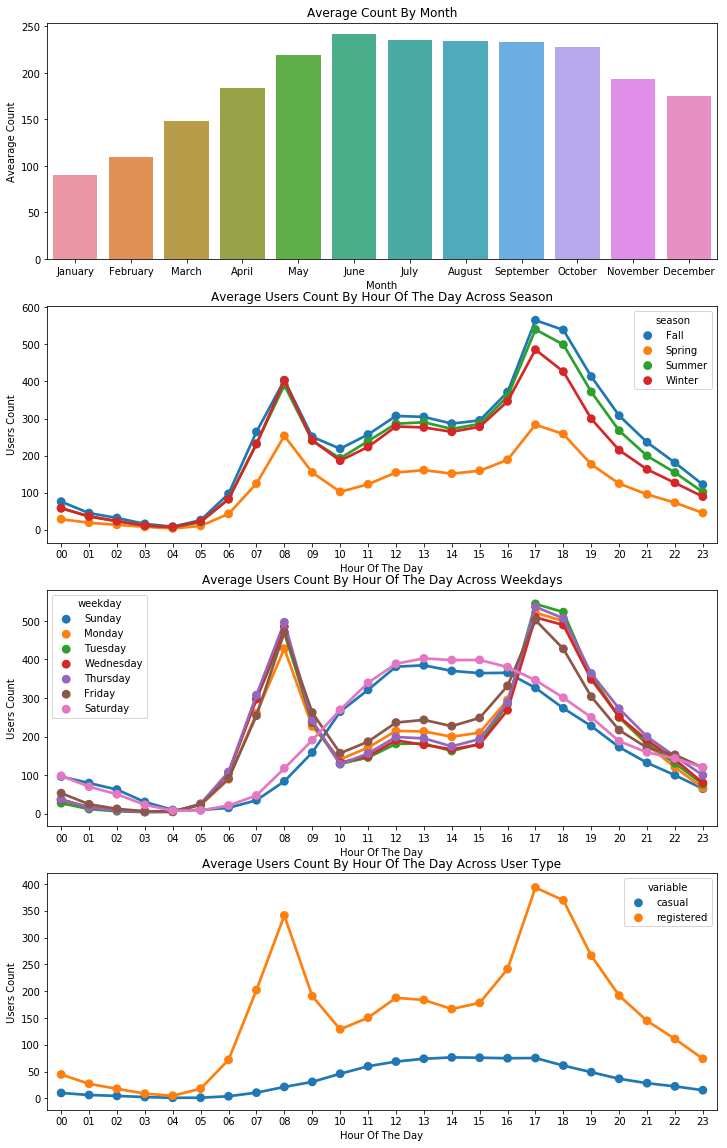

In [22]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(dailyData.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dailyData[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

So we have visualized the data to a greater extent.So lets go and build some models and see how close we can predict the results.

**Filling 0's In windspeed Using Random Forest**

Lets Read In Train And Test Data

In [24]:
dataTrain = pd.read_csv("data/train.csv")
dataTest = pd.read_csv("data/test.csv")

Combine Train And Test

In [25]:
data = dataTrain.append(dataTest)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

Feature Engineering

In [26]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Random Forest Model To Predict 0's In Windspeed

In [27]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

Coercing To Categorical Type

In [28]:
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [29]:
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

Splitting Train And Test Data

In [30]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

Dropping Unncessary Variables

In [31]:
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

RMSLE Scorer

In [32]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

**Linear Regression Model**

In [33]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

('RMSLE Value For Linear Regression: ', 0.9779773467899192)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


**Regularization Model - Ridge**

{'alpha': 0.1, 'max_iter': 3000}
('RMSLE Value For Ridge Regression: ', 0.9779773317315158)


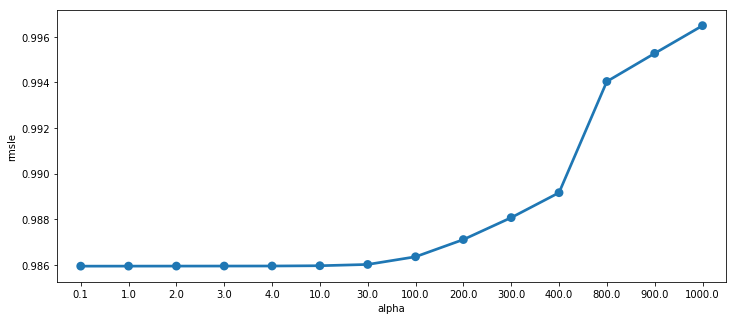

In [34]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

**Regularization Model - Lasso**

{'alpha': 0.005, 'max_iter': 3000}
('RMSLE Value For Lasso Regression: ', 0.9781152521984682)


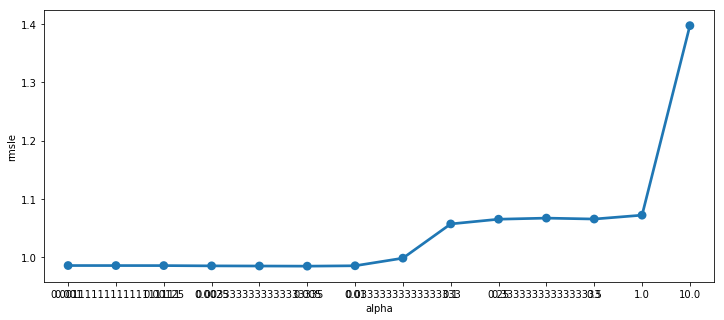

In [35]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.grid_scores_)
df["alpha"] = df["parameters"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

**Ensemble Models - Random Forest**

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

('RMSLE Value For Random Forest: ', 0.10296066766612914)


**Ensemble Model - Gradient Boost**

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

('RMSLE Value For Gradient Boost: ', 0.1895337659259485)


Lets compare the distribution of train and test results. More or less the distribution of train and test looks identical. It confirms visually that our model has not predicted really bad and not suffering from major overfitting problem.

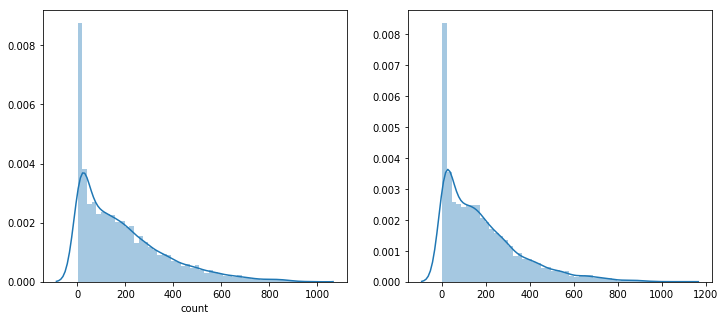

In [39]:
predsTest = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.distplot(yLabels,ax=ax1,bins=50)
sn.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [40]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)

The submission will have test score of 0.41

# Conclusion:
## Advantage: 
1. This Kaggler did a good data cleaning with combine the train dataset and test dataset together.
2. This Kaggler did a very great data exploration. This team separate the given datetime to `year`, `month`, `hour`, `dayofweek`. It will be more convenient for using in model. Moreover, this team gave a reasonable categoryVariableList.
3. This Kaggler built 5 models:
```
RMSLE Value For Linear Regression:  0.9779773467899192
RMSLE Value For Ridge Regression:  0.9779773317315158
RMSLE Value For Lasso Regression:  0.9781152521984682
RMSLE Value For Random Forest:  0.10296066766612914
RMSLE Value For Gradient Boost:  0.1895337659259485
```
Random Forest and  Gradient Boost is much better than the previous three ones. It help me narrowed the selection of models.

4. Remind me to check if result is less than 0. Although as it turns out, it doesn't hurt too much.

# No.3

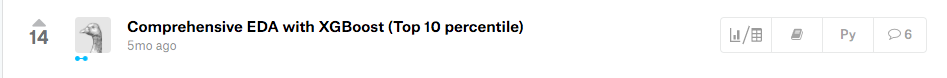

In [43]:
import pandas as pd

train_df=pd.read_csv('data/train.csv')

In [44]:
train_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [45]:
train_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


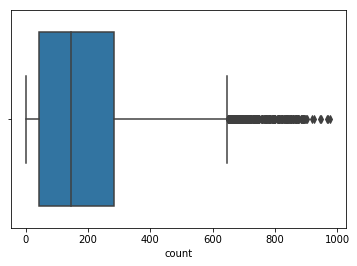

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox

sns.boxplot(train_df['count'])
plt.show()

We cannot think of any strong evidence to get rid of outlier data. As per Chebychev's rule, 3 std. deviations account for 99% of data. Using this approach, we filter out the rest of the data.

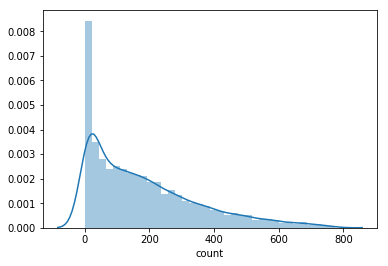

In [47]:
cnt=train_df['count'].values
q99=np.percentile(cnt,[99])


train_df=train_df[train_df['count']<q99[0]]
sns.distplot(train_df['count'])
plt.show()

As this is a highly skewed data, we will try to transform this data using either log, square-root or box-cox transformation. After trying out all three, log square gives the best result. Also as the evaluation metric is NLMSE, using log would help as it would allow to less penalize the large difference in final variable values.

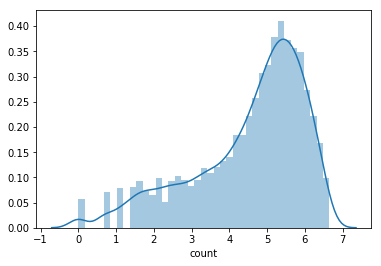

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
5        0.000000
6        0.693147
7        1.098612
8        2.079442
9        2.639057
10       3.583519
11       4.025352
12       4.430817
13       4.543295
14       4.663439
15       4.700480
16       4.532599
17       4.204693
18       3.555348
19       3.610918
20       3.583519
21       3.526361
22       3.332205
23       3.663562
24       2.833213
25       2.833213
26       2.197225
27       1.791759
28       1.098612
29       0.693147
           ...   
10856    6.263398
10857    5.866468
10858    5.590987
10859    5.123964
10860    4.882802
10861    4.394449
10862    3.713572
10863    2.708050
10864    1.098612
10865    1.609438
10866    1.945910
10867    3.433987
10868    4.718499
10869    5.894403
10870    6.519147
10871    5.758902
10872    5.099866
10873    5.298317
10874    5.463832
10875    5.361292
10876    5.384495
10877    5.468060
10878    5.811141
10879    6.331502
10880    6

In [48]:
#from scipy.stats import boxcox
train_df['count']=train_df['count'].apply(lambda x:np.log(x))
#train_df['count']=boxcox(train_df['count'])[0]
sns.distplot(train_df['count'])
plt.show()
print (train_df['count'])

Univariate analysis of all variables Categorical data--> Season, Holiday, WorkingDay, Weather

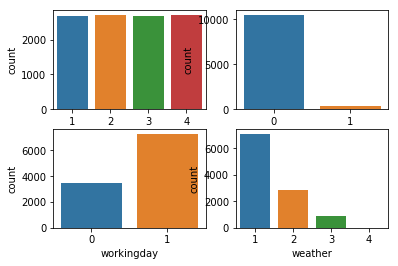

In [49]:
cat_names=['season', 'holiday', 'workingday', 'weather']

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=train_df) 
    
plt.show()

Univariate analysis for continuous data

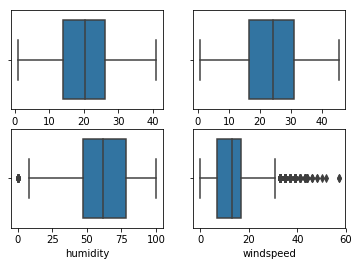

In [50]:
cont_names=['temp','atemp','humidity','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=train_df) 
    
plt.show()

Some of the inferences that can be made:

* Holiday and working day look somewhat correlated. Can one of them be removed to avoid multi-collinearity?Let's wait until we calculate thier correlation value
* Not much can be inferred from season data. Majority of the data fall under 1 and 2, which is clear skies mist/cloudy.
* Temp, Atemp, humidity look normally distributed. However, windspeed has a lot of outliers which will be analysed further.
* doing a brief time-series analysis to see if there's any improvement in count over a period of time
* moving average to be calculated for a period of 3/4 months as that is the no of months in one season

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  # Remove the CWD from sys.path while we load stuff.


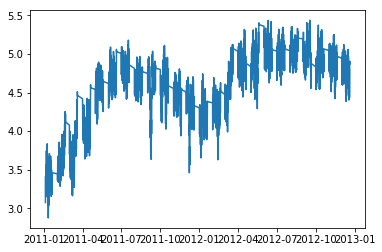

In [51]:
from datetime import datetime

train_df['datetime']=train_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
time_series_df=train_df
time_series_df.index=train_df['datetime']

import matplotlib.pyplot as plt

#Applying rolling average on a period of 60 days, as the typical weather lasts for around 3 months (20 days in training data of each month)
plt.plot(pd.rolling_mean(time_series_df['count'],60))
plt.show()

As expected the total count grows over a period of time following an increasing cyclic pattern, therefore the model needs to incorporate changes in seasonality too, for which we would be using the month and year variables.

Biivariate analysis on continuous data

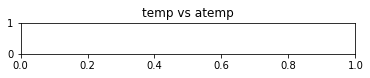

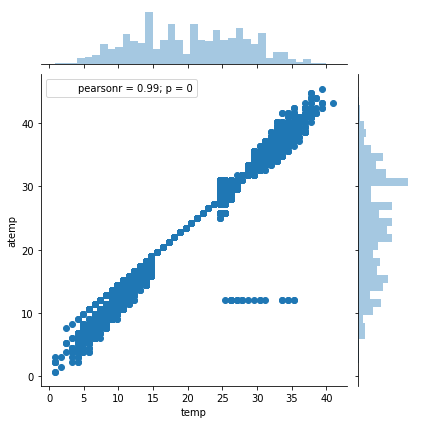

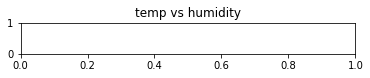

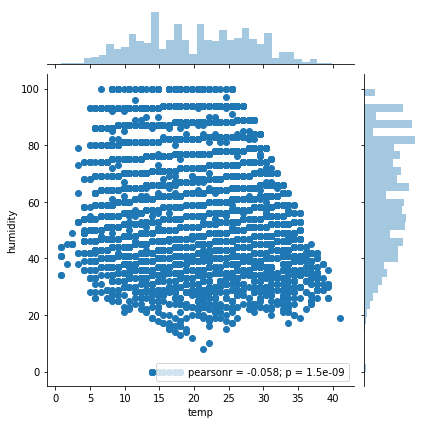

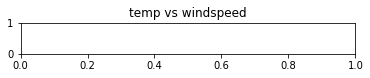

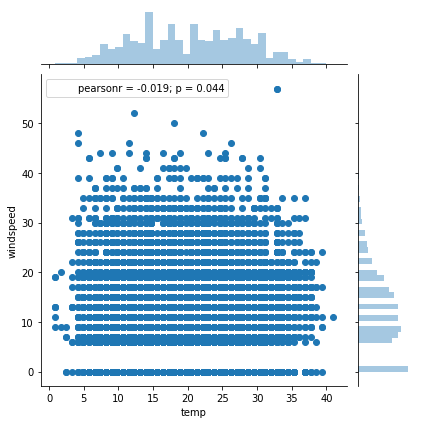

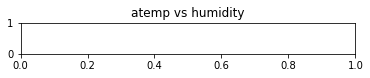

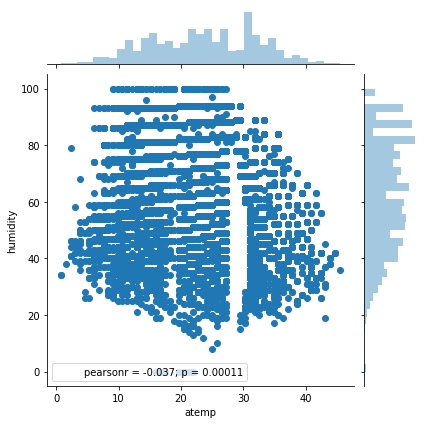

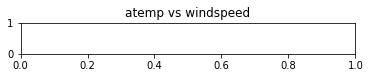

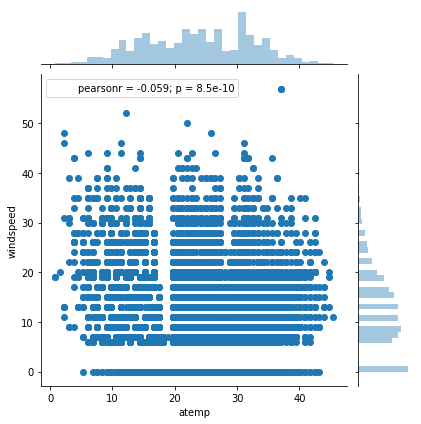

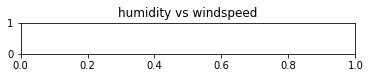

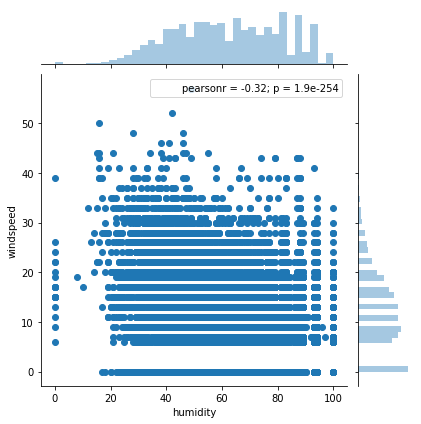

In [53]:
i=1
for name_1 in cont_names:
    j=cont_names.index(name_1)


    while(j<len(cont_names)-1):


        plt.subplot(6,1,i)
        plt.title(name_1+' vs '+cont_names[j+1])
        sns.jointplot(x=name_1,y=cont_names[j+1],data=train_df) 
        j=j+1
        i=i+1
        plt.show()

Not much can be inferred about the distribution of these variables except for variable 'temp' and 'atemp' that almost have similar context. We would be using the 'temp' and getting rid of the 'atemp' variables for better precision value and avoiding multi-collinearity.

Let us perfrom some feature engineering. The datetime column can be used to extract data like the month, day, hour which can be used in our model for making better predictions.

In [54]:
from datetime import datetime

#converting string dattime to datetime


#train_df['datetime']=train_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

new_df=train_df

new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)
#new_df['weekday_flag']=new_df['datetime'].apply(weekday_flag)
new_df['mnth+day']=new_df['datetime'].apply(lambda x:str(x.month)+'_'+str(x.day))

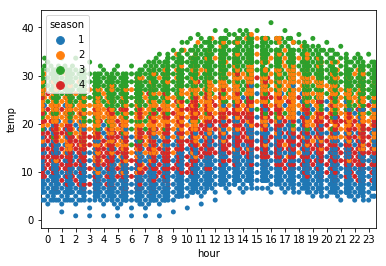

In [55]:
sns.swarmplot(x='hour',y='temp',data=new_df,hue='season')
plt.show()

A non-linear relationship between temperature and day of the hour according to different seasons is evident from this chart. Feature engineering to create bins on an hourly basis.

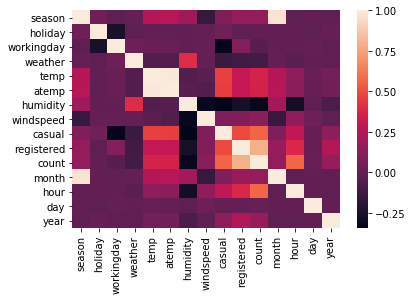

In [56]:
new_df.cov()
sns.heatmap(new_df.corr())
plt.show()

A lot of inferences that we have already covered could be verified using the following heatmap

In [57]:
new_df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
season,1.000000,0.030145,-0.010817,0.008974,0.258755,0.264946,0.192384,-0.147584,0.094874,0.160850,0.157441,0.971723,-0.008572,0.001907,-0.008825
holiday,0.030145,1.000000,-0.249987,-0.007546,0.002004,-0.003614,0.000788,0.008659,0.046419,-0.015456,0.002128,0.002389,0.000935,-0.015656,0.013820
workingday,-0.010817,-0.249987,1.000000,0.035943,0.023581,0.018510,-0.006626,0.012621,-0.330633,0.101270,-0.028357,-0.005883,-0.002239,0.008881,-0.009251
weather,0.008974,-0.007546,0.035943,1.000000,-0.052743,-0.053423,0.405825,0.007399,-0.134227,-0.108182,-0.103790,0.012510,-0.020862,-0.006143,-0.010069
temp,0.258755,0.002004,0.023581,-0.052743,1.000000,0.985282,-0.058217,-0.019430,0.461425,0.307082,0.365795,0.257081,0.138337,0.014515,0.051975
atemp,0.264946,-0.003614,0.018510,-0.053423,0.985282,1.000000,-0.037285,-0.059061,0.457020,0.304222,0.361851,0.263763,0.133509,0.011276,0.049660
humidity,0.192384,0.000788,-0.006626,0.405825,-0.058217,-0.037285,1.000000,-0.319597,-0.342272,-0.262680,-0.323366,0.206496,-0.274304,-0.008549,-0.072691
windspeed,-0.147584,0.008659,0.012621,0.007399,-0.019430,-0.059061,-0.319597,1.000000,0.091620,0.094089,0.120141,-0.151158,0.146080,0.035797,-0.016638
casual,0.094874,0.046419,-0.330633,-0.134227,0.461425,0.457020,-0.342272,0.091620,1.000000,0.495236,0.562300,0.090319,0.295752,0.011213,0.134985
registered,0.160850,-0.015456,0.101270,-0.108182,0.307082,0.304222,-0.262680,0.094089,0.495236,1.000000,0.792261,0.167515,0.383665,0.013990,0.245989


A lot of inferences that we have already hypothesised could be verified using the following heatmap and correlation matrix.

Visualizing multi-variate distribution of target variable with other categorical data.

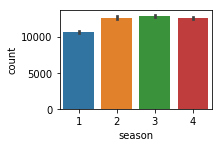

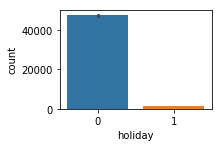

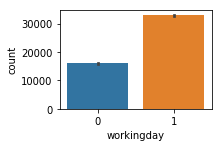

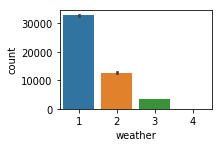

In [58]:
cat_names=['season', 'holiday', 'workingday', 'weather']
i=1
for name in cat_names:
    plt.subplot(2,2,i)
    sns.barplot(x=name,y='count',data=new_df,estimator=sum)
    i=i+1
    plt.show()

* With weather 1,2 and season 2,3 and working days the bicycle rental count is maximum.
* As per the analysis, we need to get rid off these variables to be inputted in our model:season. Working day has better correlation with count, weather,working day, hour,year has to be label encoded

In [59]:
final_df=new_df.drop(['datetime','temp','windspeed','casual','registered','mnth+day','day'], axis=1)
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,2.772589,1,0,2011
2011-01-01 01:00:00,1,0,0,1,13.635,80,3.688879,1,1,2011
2011-01-01 02:00:00,1,0,0,1,13.635,80,3.465736,1,2,2011
2011-01-01 03:00:00,1,0,0,1,14.395,75,2.564949,1,3,2011
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.000000,1,4,2011


Adding dummy varibles to categorical data

In [60]:
weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
year_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)
                     


final_df=final_df.join(weather_df)
final_df=final_df.join(year_df)
final_df=final_df.join(month_df)                     
final_df=final_df.join(hour_df)
final_df=final_df.join(season_df)
                     
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,2.772589,1,0,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,1,0,0,1,13.635,80,3.688879,1,1,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 02:00:00,1,0,0,1,13.635,80,3.465736,1,2,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 03:00:00,1,0,0,1,14.395,75,2.564949,1,3,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.000000,1,4,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
final_df.columns

Index([u'season', u'holiday', u'workingday', u'weather', u'atemp', u'humidity',
       u'count', u'month', u'hour', u'year', u'w_2', u'w_3', u'w_4', u'y_2012',
       u'm_2', u'm_3', u'm_4', u'm_5', u'm_6', u'm_7', u'm_8', u'm_9', u'm_10',
       u'm_11', u'm_12', u'h_1', u'h_2', u'h_3', u'h_4', u'h_5', u'h_6',
       u'h_7', u'h_8', u'h_9', u'h_10', u'h_11', u'h_12', u'h_13', u'h_14',
       u'h_15', u'h_16', u'h_17', u'h_18', u'h_19', u'h_20', u'h_21', u'h_22',
       u'h_23', u's_2', u's_3', u's_4'],
      dtype='object')

Now that we have got our guns lock and loaded, it's time to shoot. lets begin the modelling process.

In [62]:
X=final_df.iloc[:,final_df.columns!='count'].values
print (X)

Y=final_df.iloc[:,6].values

print (Y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [4. 0. 1. ... 0. 0. 1.]
 [4. 0. 1. ... 0. 0. 1.]
 [4. 0. 1. ... 0. 0. 1.]]
[2.77258872 3.68887945 3.4657359  ... 5.12396398 4.8598124  4.47733681]


Choosing the appropriate model for regression 

After trying multiple linear regression, poly linear regression, SVR, Decision Tree regression and RF regression,XGRegressor Out of these, we would be choosing the one having the best accuracy and applying GridSearchCV for optimal hyperparmater tuning. XGBoost gives the maximum accuracy of R2 square (92.5%)

In [63]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV

def grid_search():
    print ('lets go')

    xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4)
    xgr.fit(X,Y)

    #rf=RandomForestRegressor(n_estimators=100,random_state=0)
    #rf.fit(X,Y)

    
    #parameters=[{'max_depth':[8,9,10,11,12],'min_child_weight':[4,5,6,7,8]}]
    #parameters=[{'gamma':[i/10.0 for i in range(0,5)]}]
    parameters=[{'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]}]

    grid_search= GridSearchCV(estimator=xgr, param_grid=parameters, cv=10,n_jobs=-1)


    print (1)
    grid_search=grid_search.fit(X,Y)
    print (2)
    best_accuracy=grid_search.best_score_
    best_parameters=grid_search.best_params_
    print (best_accuracy)
    print (best_parameters)


Grid search gives best accuracy for max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6 Training the model again with these new parameters.

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(X,Y)
imp_list=rf.feature_importances_
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(final_df.columns, rf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

In [65]:
import operator
sorted_x = sorted(feats.items(), key=operator.itemgetter(1),reverse=True)
print (sorted_x)

[('month', 0.6845749061301916), ('atemp', 0.05701326543862302), ('workingday', 0.0557271005296765), ('count', 0.03269338883613692), ('humidity', 0.026337317853907787), ('h_3', 0.01641792999688389), ('w_4', 0.01634865195386596), ('hour', 0.014186189494841002), ('season', 0.012307110433862496), ('h_5', 0.011609062709718095), ('h_2', 0.01136586141020507), ('h_4', 0.009635193962593259), ('weather', 0.0066385984288469336), ('h_1', 0.005382205426979103), ('w_2', 0.004741005105013635), ('h_7', 0.004174425908351822), ('m_12', 0.0032904173258109064), ('h_6', 0.0031943735337868406), ('holiday', 0.002334080448699594), ('h_16', 0.0020698045326348192), ('h_17', 0.0015462973958901068), ('year', 0.001442979652064034), ('h_9', 0.0011909165391947528), ('h_22', 0.0009898934896059087), ('m_3', 0.0009636193407063755), ('y_2012', 0.0009217454281715792), ('m_2', 0.0008244098677989796), ('m_9', 0.0008140314758397034), ('m_4', 0.0007952924234623619), ('h_8', 0.0007788954966585205), ('m_8', 0.00075141407027218

In [66]:
import xgboost as xg
xgr=xg.XGBRegressor(max_depth=8,min_child_weight=6,gamma=0.4,colsample_bytree=0.6,subsample=0.6)
xgr.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=6, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

Using the same pre-processing functions on the test data:

In [69]:
new_df=pd.read_csv('data/test.csv')
new_df['datetime']=new_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)

print (new_df.head())

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  month  hour  day  year  
0        56    26.0027      1     0   20  2011  
1        56     0.0000      1     1   20  2011  
2        56     0.0000      1     2   20  2011  
3        56    11.0014      1     3   20  2011  
4        56    11.0014      1     4   20  2011  


In [70]:
new_df=new_df.drop(['datetime','temp','windspeed','day'], axis=1)
new_df.head()

,season,holiday,workingday,weather,atemp,humidity,month,hour,year
0,1,0,1,1,11.365,56,1,0,2011
1,1,0,1,1,13.635,56,1,1,2011
2,1,0,1,1,13.635,56,1,2,2011
3,1,0,1,1,12.880,56,1,3,2011
4,1,0,1,1,12.880,56,1,4,2011


In [71]:
#adding dummy varibles to categorical variables
weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
yr_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)


new_df=new_df.join(weather_df)
new_df=new_df.join(yr_df)
new_df=new_df.join(month_df)                     
new_df=new_df.join(hour_df)
new_df=new_df.join(season_df)
                     
new_df.head()

,season,holiday,workingday,weather,atemp,humidity,month,hour,year,w_2,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
0,1,0,1,1,11.365,56,1,0,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,1,13.635,56,1,1,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,1,13.635,56,1,2,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,1,12.880,56,1,3,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,1,1,12.880,56,1,4,2011,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
X_test=new_df.iloc[:,:].values
X_test.shape
#print (new_df.columns)

(6493, 50)

Using the XGBoost Regressor for predictions:

In [73]:
y_output=xgr.predict(X_test)
y_output


op=pd.DataFrame({'count':np.exp(y_output)})
op.to_csv('sub1.csv')

In [74]:
print (np.exp(y_output))

[  8.694643    3.47574     2.4818447 ... 138.94011   106.09003
  68.20572  ]


# Conclusion:
## Advantage:
1. This Kaggler did a good data cleaning. 
2. This Kaggler did a very great data exploration. This team remove `atemp` to avoid multi-collinearity and Adding dummy varibles to categorical data. It will be very useful in my own project.
3. This Kaggler built XGBoost models: Even though the team didn't give RMSLE Value For this model. He gave the result that the maximum accuracy of R2 square (92.5%).

# No.4

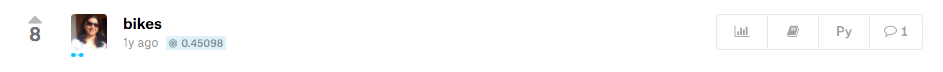

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# Any results you write to the current directory are saved as output.

In [78]:
import numpy as np 
import pandas as pd
bikes=pd.read_csv('data/train.csv')
bikes_test=pd.read_csv('data/test.csv')

In [79]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [80]:
temp= pd.DatetimeIndex(bikes['datetime'])
bikes["dayofweek"] = temp.dayofweek
bikes["hour"] = temp.hour
bikes["month"] = temp.month
bikes['year']= temp.year
temp_t=pd.DatetimeIndex(bikes_test['datetime'])
bikes_test["dayofweek"] = temp_t.dayofweek
bikes_test["hour"] = temp_t.hour
bikes_test["month"] = temp_t.month
bikes_test['year']= temp_t.year

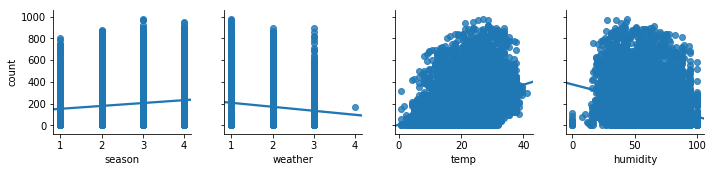

In [82]:
import seaborn as sns
sns.pairplot(bikes, x_vars=['season', 'weather','temp', 'humidity'], y_vars='count', kind='reg')

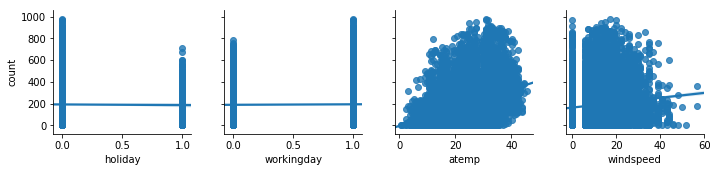

In [83]:
sns.pairplot(bikes, x_vars=['holiday', 'workingday','atemp', 'windspeed'], y_vars='count', kind='reg')

In [84]:
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dayofweek,hour,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.010553,-0.006546,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.191832,-0.000354,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.704267,0.002780,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.047692,-0.022740,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,-0.038466,0.145430,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,-0.040235,0.140343,0.264173,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.026507,-0.278011,0.204537,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.024804,0.146631,-0.150192,-0.015221
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.246959,0.302045,0.092722,0.145241
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,-0.084427,0.380540,0.169451,0.264265


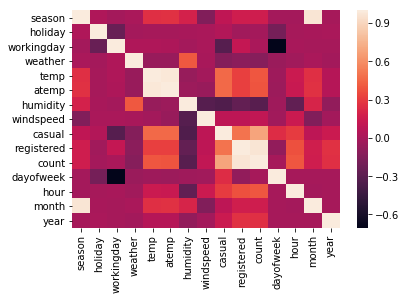

In [85]:
sns.heatmap(bikes.corr())

In [87]:
X=bikes.drop(['casual','registered','count','datetime'],axis=1)
y=bikes['count']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
dayofweek     10886 non-null int32
hour          10886 non-null int32
month         10886 non-null int32
year          10886 non-null int32
dtypes: float64(3), int32(4), int64(5)
memory usage: 850.5 KB


In [88]:
new_y = np.log(y + 1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.33, random_state = 42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
mean_squared_error(y_test, prediction) 

0.1053107299899399

In [90]:
rf.fit(X, new_y)
bikes_test= bikes_test.drop(['datetime'],axis=1)
prediction = rf.predict(bikes_test)
prediction = np.exp(prediction) - 1

In [95]:
df=pd.DataFrame({'datetime':datetime, 'count':prediction})
df.to_csv('prediction', index = False, columns=['datetime','count'])

## Conclusion
This team only used RandomForest Model to do the project. The only good point for me is remind me that using count_log will be easier than count as the evaluation is RMSLE.

# No.5

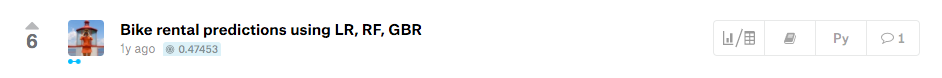

In [96]:
import numpy as np 
import pandas as pd 
from sklearn import cross_validation, grid_search, linear_model, metrics, pipeline, preprocessing

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE) so lets define it. Also we are using common mean absolute error

In [97]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [98]:
data = pd.read_csv("data/train.csv")

In [99]:
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [100]:
data.isnull().values.any()

False

In [102]:
data.datetime = data.datetime.apply(pd.to_datetime)
data['month'] = data.datetime.apply(lambda x : x.month)
data['hour'] = data.datetime.apply(lambda x : x.hour)
data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1


In [103]:
train_data = data.iloc[:-1000, :]
test_data = data.iloc[-1000:, :]
print(data.shape, train_data.shape, test_data.shape)

((10886, 14), (9886, 14), (1000, 14))


In [104]:
train_labels = train_data['count'].values
train_data = train_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)
test_labels = test_data['count'].values
test_data = test_data.drop(['datetime', 'count', 'casual', 'registered'], axis = 1)

In [105]:
binary_data_columns = ['holiday', 'workingday']
binary_data_indices = np.array([(column in binary_data_columns) for column in train_data.columns], dtype = bool)

categorical_data_columns = ['season', 'weather', 'month'] 
categorical_data_indices = np.array([(column in categorical_data_columns) for column in train_data.columns], dtype = bool)

numeric_data_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'hour']
numeric_data_indices = np.array([(column in numeric_data_columns) for column in train_data.columns], dtype = bool)

In [106]:
transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ]

SGDRegressor

In [107]:
regressor = linear_model.Lasso(max_iter = 2000)

In [108]:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list=transformer_list)),
    ('model_fitting', regressor)
    ]
)

estimator.fit(train_data, train_labels)
predicted = estimator.predict(test_data)

print("RMSLE: ", rmsle(test_labels, predicted))
print("MAE: ",  metrics.mean_absolute_error(test_labels, predicted))

('RMSLE: ', 1.0937714470317557)
('MAE: ', 122.26901528202652)


Lets try out to filter best model parameters

In [109]:
parameters_grid = {
    'model_fitting__alpha' : [0.1, 1, 2, 3, 4, 10, 30]
}

In [110]:
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_cv = grid_search.GridSearchCV(estimator, parameters_grid, scoring = rmsle_scorer, cv = 4)
grid_cv.fit(train_data, train_labels)

predicted = grid_cv.best_estimator_.predict(test_data)

print("RMSLE: ", rmsle(test_labels, predicted))
#print("MAE: ",  metrics.mean_absolute_error(test_labels, predicted))
print("Best params: ", grid_cv.best_params_)

('RMSLE: ', 1.0534368821247613)
('Best params: ', {'model_fitting__alpha': 10})


In [111]:
estimator.get_params().keys()

['feature_processing__binary_variables_processing__pass_y',
 'feature_processing__binary_variables_processing__func',
 'feature_processing__numeric_variables_processing__selecting__kw_args',
 'feature_processing__n_jobs',
 'feature_processing__numeric_variables_processing__selecting',
 'feature_processing__categorical_variables_processing__selecting__kw_args',
 'feature_processing__numeric_variables_processing__scaling__with_std',
 'feature_processing__categorical_variables_processing__selecting__pass_y',
 'feature_processing__categorical_variables_processing__selecting__accept_sparse',
 'feature_processing__transformer_weights',
 'model_fitting__selection',
 'feature_processing__categorical_variables_processing__hot_encoding__n_values',
 'model_fitting__fit_intercept',
 'feature_processing__numeric_variables_processing__selecting__inverse_func',
 'feature_processing',
 'feature_processing__categorical_variables_processing__hot_encoding__handle_unknown',
 'feature_processing__binary_va

In [112]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state = 0, max_depth = 20, n_estimators = 150)
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', regressor)
    ]
)
estimator.fit(train_data, train_labels)
#metrics.mean_absolute_error(test_labels, estimator.predict(test_data))
print("RMSLE: ", rmsle(test_labels, estimator.predict(test_data)))

('RMSLE: ', 0.4839948896691493)


Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'pylab', 'datetime', 'var', 'log10']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,1,u'random forest model')

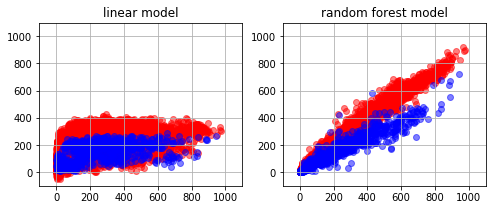

In [113]:
%pylab inline
pylab.figure(figsize=(8, 3))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('linear model')

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('random forest model')

In [114]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.9, max_depth = 4)

estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = transformer_list)),
    ('model_fitting', gbr)
    ]
)
estimator.fit(train_data, train_labels)
#metrics.mean_absolute_error(test_labels, estimator.predict(test_data))
print("RMSLE: ", rmsle(test_labels, estimator.predict(test_data)))

('RMSLE: ', 0.8716737826535274)


Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,u'gbr model')

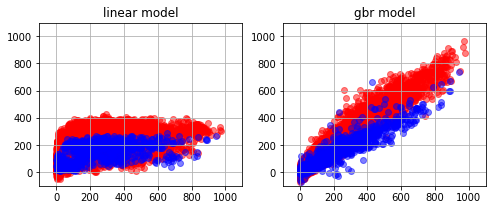

In [115]:
%pylab inline
pylab.figure(figsize=(8, 3))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, grid_cv.best_estimator_.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, grid_cv.best_estimator_.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('linear model')

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)
pylab.scatter(train_labels, estimator.predict(train_data), alpha=0.5, color = 'red')
pylab.scatter(test_labels, estimator.predict(test_data), alpha=0.5, color = 'blue')
pylab.title('gbr model')

In [117]:
real_test_data = pd.read_csv("data/test.csv")
real_test_data_ids = real_test_data["datetime"]
real_test_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [119]:
real_test_data.datetime = real_test_data.datetime.apply(pd.to_datetime)
real_test_data['month'] = real_test_data.datetime.apply(lambda x : x.month)
real_test_data['hour'] = real_test_data.datetime.apply(lambda x : x.hour)
real_test_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1


In [120]:
real_test_data = real_test_data.drop(['datetime'], axis = 1)

In [121]:
real_test_predictions = estimator.predict(real_test_data)

In [122]:
real_test_predictions.min()

-220.99993119647834

In [123]:
submission = pd.DataFrame({
        "datetime": real_test_data_ids,
        "count": [max(0, x) for x in real_test_predictions]
    })
submission.head()

,count,datetime
0,53.508275,2011-01-20 00:00:00
1,7.334838,2011-01-20 01:00:00
2,2.207221,2011-01-20 02:00:00
3,0.000000,2011-01-20 03:00:00
4,0.000000,2011-01-20 04:00:00


In [124]:
submission.to_csv('bike_predictions.csv', index=False)

## Conclusion:
1. The team scale the vairables: 'scaling', preprocessing.StandardScaler(with_mean = 0))  
2. When built model, the team tried out to filter best model parameters.
3. This team built three models using SGDRegressor, RandomForestRegressor, GradientBoostingRegressor. RandomForestRegressor is the best one in the three models.

# Others:
As mentioned Above, most kagglers chose RandomForest, GradientBoosting to build their model. However, my project is a final project for INFO 7390. The purpose is learning more model, especially deep learning model, likes neural network. So I searched `neural network` directly to find relevant information.
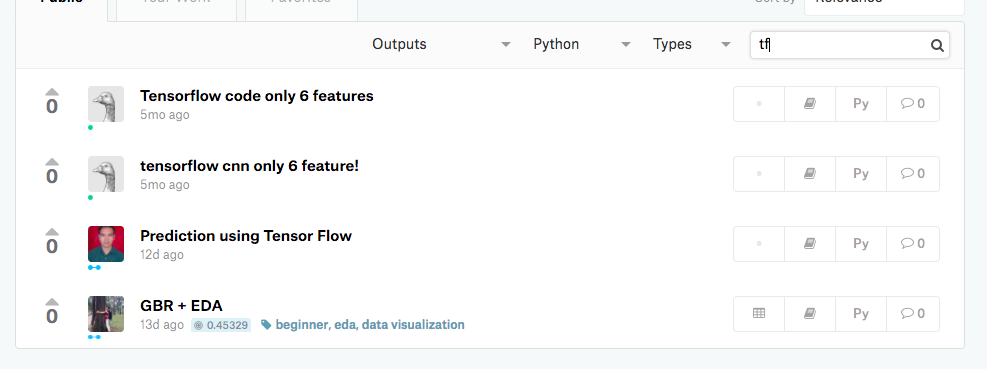
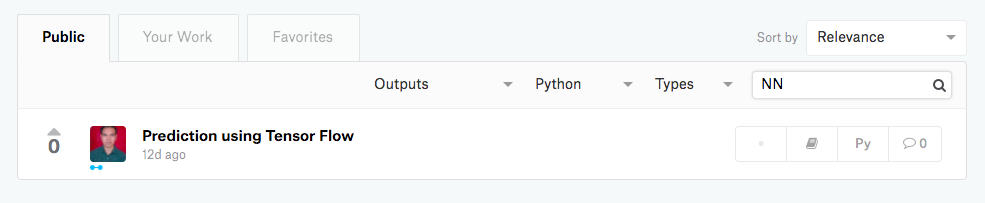

## No.1
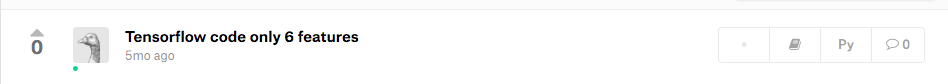

In [125]:
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [126]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

In [127]:
feature=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
x_data = train[feature]
x_data.head()

,temp,atemp,humidity,windspeed,casual,registered
0,9.84,14.395,81,0.0,3,13
1,9.02,13.635,80,0.0,8,32
2,9.02,13.635,80,0.0,5,27
3,9.84,14.395,75,0.0,3,10
4,9.84,14.395,75,0.0,0,1


In [128]:
y_data = train[['count']]
print(y_data.shape)

(10886, 1)


In [129]:
X = tf.placeholder(tf.float32, [None, 6])
Y = tf.placeholder(tf.int32, [None, 1])

In [130]:
layer1 = tf.layers.dense(inputs=X, units=100, activation=tf.nn.relu)
layer2 =tf.layers.dense(inputs=layer1, units=90, activation=tf.nn.relu)
layer3 =tf.layers.dense(inputs=layer2, units=50, activation=tf.nn.relu)
layer4 =tf.layers.dense(inputs=layer3, units=30, activation=tf.nn.relu)
layer5 =tf.layers.dense(inputs=layer4, units=1)

In [131]:
cost = tf.losses.mean_squared_error(Y, layer5)
tf.summary.scalar('cost', cost)
train = tf.train.AdamOptimizer().minimize(cost)

In [132]:
init = tf.global_variables_initializer()
summary = tf.summary.merge_all()

with tf.Session() as sess:
    sess.run(init)
    merged = tf.summary.merge_all()
    train_writer = tf.summary.FileWriter('train', sess.graph)
    
    for idx in range(10000):
        s, c, _= sess.run([summary, cost, train], feed_dict={
                X: x_data,
                Y: y_data
            })
        train_writer.add_summary(s, global_step=idx)
        
        if idx % 1000 == 0:
            print(idx, c)

(0, 74759.484)
(1000, 0.115159824)
(2000, 0.04672662)
(3000, 0.03331542)
(4000, 0.021475056)
(5000, 0.31772593)
(6000, 0.5148386)
(7000, 0.012492474)
(8000, 0.009796803)
(9000, 0.008325656)


## Conclusion:
1. The team provide a new model which is using Dense and NN together.
2. The not good thing is that he only use 6 features.

## No.3

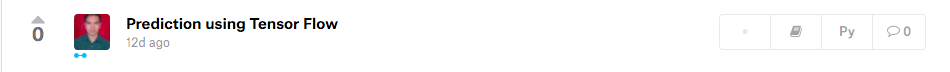

In [136]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

print(os.listdir("data"))

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [137]:
train = pd.read_csv('data/train.csv')
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [138]:
test = pd.read_csv('data/test.csv')
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [139]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [140]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']].astype('float32')
Y = train['count'].astype('float32')

In [141]:
split = 0.20
seed = 415
X, Y = shuffle(X, Y, random_state=1)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=split, random_state=seed)

In [142]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [143]:
X.shape

(10886, 8)

In [144]:
print("train_x.shape",train_x.shape)
print("train_y.shape",train_y.shape)
print("test_x.shape",test_x.shape)
print("test_y.shape",test_y.shape)

('train_x.shape', (8708, 8))
('train_y.shape', (8708,))
('test_x.shape', (2178, 8))
('test_y.shape', (2178,))


In [145]:
learning_rate = 0.3
training_epochs = 5
cost_history = np.empty(shape=[1], dtype=float)
Y.shape

(10886,)

In [146]:
_X = tf.placeholder(tf.float32,shape=[None,8])
_Y = tf.placeholder(tf.float32,shape=[None])


sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [147]:
# Model architecture parameters
n = 8
n_neurons_1 = 60
n_neurons_2 = 60
n_neurons_3 = 60
n_neurons_4 = 60
n_target = 1
# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_4, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [148]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(_X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))
#out = tf.reshape(out,(train_x.shape[0],1))
hidden_4.shape

TensorShape([Dimension(None), Dimension(60)])

In [149]:
# Define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out, labels=_Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [150]:
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [151]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
mse_history = []
accuracy_history = []

In [152]:
#Calculate the cost and the accuracy for each epoch
for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={_X:train_x, _Y:train_y})
    cost = sess.run(cost_function,feed_dict={_X:train_x, _Y:train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(Y,-1),tf.argmax(_Y,-1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    #print("Accuracy: ", (sess.run(accuracy, feed_dict={_X:test_x, _Y:test_y})))
    pred_y = sess.run(out,feed_dict={_X:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y.values))
    mse_ = sess.run(mse)
    accuracy = (sess.run(accuracy,feed_dict={_X:train_x, _Y:train_y}))
    accuracy_history.append(accuracy)
    print('epoch: ', epoch,' - ', 'cost: ', cost, " - MSE: ", mse_, "- Train Accuracy: ", accuracy)

('epoch: ', 0, ' - ', 'cost: ', inf, ' - MSE: ', inf, '- Train Accuracy: ', 0.0)
('epoch: ', 1, ' - ', 'cost: ', nan, ' - MSE: ', nan, '- Train Accuracy: ', 0.0)
('epoch: ', 2, ' - ', 'cost: ', nan, ' - MSE: ', nan, '- Train Accuracy: ', 0.0)
('epoch: ', 3, ' - ', 'cost: ', nan, ' - MSE: ', nan, '- Train Accuracy: ', 0.0)
('epoch: ', 4, ' - ', 'cost: ', nan, ' - MSE: ', nan, '- Train Accuracy: ', 0.0)


## Conclusion:

This team also use NN to build model. However, the result is odd. The most thing it can provided to me is his idea and steps.

# literature review

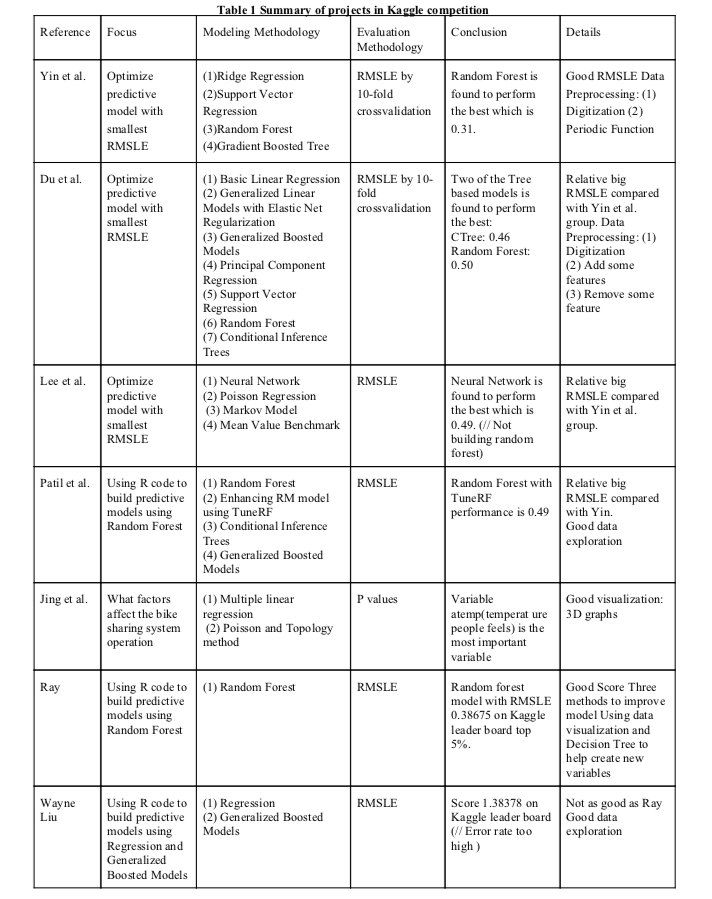

## Conclusion:

Based on the case study of modelling algorithms in similar project of Kaggle competition , four of six cases found random forest perform best, 

Du et al.② found tree based models show best performance, the error rate of which are Ctree: 0.46 and random forest 0.50. 

Lee et al. ③ found Neural Network performs the best with 0.49 error rate, but she did not build random forest model. 

Beside them, Ray’s④ random forest model gets top 5% in Kaggle Competition leader board. 


# Summaries

* By the end date of this competition, 3252 teams from all over the world provided their solutions. There are about 90% teams using Random Forest and Gradient Boost model to do prediction, with little team using other models, for example, Neural Network. There are two reasons for this phenomenon: First, the competition was held in  between 2014 and 2015. Neural Network was not much popular as now, most teams would be choose Neural Network as their model; Second, the result of Neural Network was not good, once these teams found a better model, they will replace Neural Network. 


* These surveys from kaggles literatures gave some good points: 
   * Feature temp and atemp have high correlation, I need only analysis one feature in my own project to avoid multi-collinearity.
   * The datetime column can be used to extract data like the month, day, hour which can be used in model for making better predictions.
   * Random Forest and Gradient Boost model could get good result.
   * Dummy variables and scaling variables are good ideas.
   * Remeber handle the output, let them euqal or bigger than 0.
   * Choose RMSLE which kaggle provided as the own stanard, it will be easy to compare the predict result.


* Extention will be in my own project:
   * Except analysis the basic features, I will create additional features in data exploration to give more categories for the project.
   * Most kaggles pridect count directly. However, Adding the value of registered and casual will equal to count. I will use two way to predict count: predict count directly, predict registered ad casual separately and then get the value of count.
   * Even though RandomForest and GBoost Model are really predict good than Neural Network. However, this project is a final project in course INFO 7390, the propose is learn how to use both machine learning and deep learning. In this project, I still use one kind of Neural Network to predict count as professor suggest.

* license: 

Codes comes form kaggle website. 
https://www.kaggle.com/c/bike-sharing-demand

The code in the document is licensed under the MIT License: https://opensource.org/licenses/MIT

All writing in the document is licensed bt The Creative Commons Attribution 3.0 https://creativecommons.org/licenses/by/3.0/us/.